# **🎸 Explorando as Tendências Musicais da Plataforma do Spotify - Um estudo de caso Ciência/Análise de Dados**

### **Objetivo do Projeto**

Analisar as tendências musicais da plataforma Spotify por meio de técnicas de Ciência e Análise de Dados. Identificando padrões nas caracteristicas das musicas, comportamento das musicas ao longo do tempo e fatores que influenciam ao sucesso das músicas. Desta forma, esse estudo visa gerar insights relevantes sobre o mercado musical e apoiar tomadas de decisão baseadas em dados.



---

## **1. Instalação das Bibliotecas**

Realização da ação de importação de determinadas bibliotecas da linguagem Python, trazendo diversos benefícios para o projeto. Dentre eles:

* Melhora na eficiência e na qualidade do código.
* Economizando tempo.
* Permitem alterações no código a realização de determinadas ações de forma modular.

Bibliotecas que foram instaladas:

* **Pandas:** Para manipulação e análise de dados tabulares.
* **Numpy:** Operações matemáticas e arrays multimensionais.
* **Matplotlib:** Importada para realizarmos visualizações e gráficos focado em dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Coleta de Dados**

Utilizamos um arquivo no formato CSV denominado como **`popular_spotify_songs`**, que nele contém os determinados aspectos:

* **Período Histórico da Base:** Dados de musicas de 1930 até 2023

* **Nível de Granularidade:** O nível de granularidade é Anual. Desta forma, permitindo análises detalhadas das tendências ao longo do tempo, variações sazonais e crescimento anual dos lançamentos musicais.



In [2]:
"""
Objetivo: O código abaixo realiza a captura e leitura de um arquivo CSV e um 
processo de validação verificando o nome das colunas para verificar se a importação 
foi bem sucedida.

1. Lê o arquivo CSV usando o método de pd.read_csv(), armazenando os dados coletados em um Data Frame do Python.

2. Usando a sintaxe de nome_arquivo.columns, conseguimos verificar os nomes das colunas fazendo um processe de validação.
    *  A exibição dos nomes das colunas permite verificar se o arquivo CSV foi importado corretamente e 
       se as colunas estão nomeadas como esperado
"""
#==========================================================================================================================

# Lendo o arquivo CSV (Popular_Spotify_Songs.csv)
Base_Musicas_Spotify = pd.read_csv(r'C:\Users\F8090067\Documents\Estudo Analitico\Popular_Spotify_Songs.csv', encoding='latin1', sep=';')

# Um processo de validação na qual exibo os nomes das colunas do Data Frame para verificar se a importação do conjunto de dados deu certo.
Base_Musicas_Spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'released_year_correct', 'released_month_correct'],
      dtype='object')

### **2.1 Organização do Conjunto de Dados**

* **Objetivo:**  Deixar o conjunto de dados mais estruturado e compreender quais são as principais features e como devemos utilizar elas no projeto.

* **Ações Realizadas:** 

    * Renomear nomes das colunas
    * Descrição de cada feature

###  **Colunas Renomeadas**

In [3]:
Colunas_Renomeadas = [
    'nome_musica', 'nome_artista', 'qtd_artistas', 'ano_lancamento',
    'mes_lancamento', 'dia_lancamento', 'playlists_spotify',
    'charts_spotify', 'reproducoes', 'playlists_apple', 'charts_apple',
    'playlists_deezer', 'charts_deezer', 'charts_shazam', 'bpm',
    'tom', 'modo', 'dançabilidade', 'valência', 'energia',
    'acusticidade', 'instrumentalidade', 'vivacidade', 'oralidade',
    'ano_corrigido', 'mes_corrigido'
]

Base_Musicas_Spotify.columns = Colunas_Renomeadas

Base_Musicas_Spotify.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome_musica        947 non-null    object
 1   nome_artista       947 non-null    object
 2   qtd_artistas       947 non-null    object
 3   ano_lancamento     947 non-null    int64 
 4   mes_lancamento     947 non-null    int64 
 5   dia_lancamento     947 non-null    int64 
 6   playlists_spotify  947 non-null    int64 
 7   charts_spotify     947 non-null    int64 
 8   reproducoes        947 non-null    object
 9   playlists_apple    947 non-null    int64 
 10  charts_apple       947 non-null    int64 
 11  playlists_deezer   947 non-null    object
 12  charts_deezer      947 non-null    int64 
 13  charts_shazam      897 non-null    object
 14  bpm                947 non-null    int64 
 15  tom                854 non-null    object
 16  modo               946 non-null    object
 1

### **Descrição do Conjunto de Dados**

* **Quantidade de Features:** 22

* Abaixo, temos uma brece descrição do objetivo daquela coluna:


| Coluna                    | Descrição                                                                 |
|---------------------------|---------------------------------------------------------------------------|
| `track_name`              | Nome da música.                                                          |
| `artist(s)_name`          | Nome(s) do(s) artista(s) que interpretam a faixa.                        |
| `artist_count`            | Quantidade de artistas envolvidos na música.                             |
| `released_year`           | Ano original de lançamento da música.                                    |
| `released_month`          | Mês original de lançamento.                                              |
| `released_day`            | Dia do lançamento.                                                       |
| `released_year_correct`   | Ano de lançamento corrigido .                                            |
| `released_month_correct`  | Mês de lançamento corrigido.                                             |
| `in_spotify_playlists`    | Número de playlists do Spotify em que a música aparece.                  |
| `in_spotify_charts`       | Número de vezes que a música apareceu em rankings do Spotify.            |
| `streams`                 | Número total de reproduções no Spotify.                                  |
| `in_apple_playlists`      | Número de playlists da Apple Music com a música.                         |
| `in_apple_charts`         | Número de aparições em rankings da Apple Music.                          |
| `in_deezer_playlists`     | Número de playlists da Deezer com a música.                              |
| `in_deezer_charts`        | Número de aparições em rankings da Deezer.                               |
| `in_shazam_charts`        | Número de vezes que a música apareceu em rankings do Shazam.             |
| `bpm`                     | Batidas por minuto – ritmo da música.                                    |
| `key`                     | Tom musical da música.                                                   |
| `mode`                    | Modo musical: 0 = menor, 1 = maior.                                      |
| `danceability_%`          | Quão dançante é a música (0 a 100%).                                     |
| `valence_%`               | Grau de positividade/alegria da música (0 a 100%).                       |
| `energy_%`                | Energia da música (0 a 100%).                                            |
| `acousticness_%`          | Probabilidade da música ser acústica (0 a 100%).                         |
| `instrumentalness_%`      | Probabilidade de ser uma faixa instrumental (0 a 100%).                  |
| `liveness_%`              | Probabilidade de a faixa ter sido gravada ao vivo (0 a 100%).            |
| `speechiness_%`           | Presença de palavras faladas na faixa (0 a 100%).                        |



## **3. Validação da Base de Dados**

* **Objetivo**

Realização de determinadas validações para conseguirmos compreender como está a distribuição dos dados dentro da base. Certamente, essa etapa auxilia no entendimento de que técnicas de pré - processamentos podemos aplicar e por qual caminhao as nossas análises tendem a ir a partir dessas validações.

* **Ações Realizadas**

    * Conversão do Tipo de Dado

        * 
        
    * Identificação de valores nulos

        * Foi realizada uma validação inicial da base de dados, focando na verificação de valores nulos em cada coluna. Desta forma, foi identificado que a maioria das colunas não possui valores nulos e está pronta para análise. Porém, há 3 colunas que possuem dados faltantes:

        * `charts_shazam:` 50 valores nulos — pode indicar músicas que não apareceram no ranking do Shazam.
        * `tom:` 93 valores nulos — pode indicar ausência de informação sobre o tom musical.
        * `modo:`1 valor nulo — fácil de corrigir com valor mais comum (ex: modo maior).

    * Identificação de valores duplicados

        * Não há presença de valores duplicados. Desta forma não será necessário realizar a remoção/trativas desses valores.
        

    * Identificar Outliers em cada feature

        * Uma análise de outliers utilizando boxplot para cada variável numéricas da nossa base de dados. Desta forma, foi identificado que:

        * A maioria das variáveis apresenta uma distribuição concentrada sem grandes variações.
        * No entanto, colunas como playlists_apple demonstraram a presença de outliers extremos, indicando músicas com números de inclusão em playlists muito acima da média.
        * Esses valores fora da curva podem representar grandes sucessos ou casos atípicos que merecem atenção na análise.

### **3.1 Conversão do Tipo de Dado**

In [20]:
Base_Musicas_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome_musica        947 non-null    object
 1   nome_artista       947 non-null    object
 2   qtd_artistas       947 non-null    object
 3   ano_lancamento     947 non-null    int64 
 4   mes_lancamento     947 non-null    int64 
 5   dia_lancamento     947 non-null    int64 
 6   playlists_spotify  947 non-null    int64 
 7   charts_spotify     947 non-null    int64 
 8   reproducoes        947 non-null    object
 9   playlists_apple    947 non-null    int64 
 10  charts_apple       947 non-null    int64 
 11  playlists_deezer   947 non-null    object
 12  charts_deezer      947 non-null    int64 
 13  charts_shazam      947 non-null    object
 14  bpm                947 non-null    int64 
 15  tom                947 non-null    object
 16  modo               946 non-null    object
 1

In [21]:
# Converter colunas numéricas mal interpretadas como object
Base_Musicas_Spotify['qtd_artistas'] = pd.to_numeric(Base_Musicas_Spotify['qtd_artistas'], errors='coerce')
Base_Musicas_Spotify['reproducoes'] = pd.to_numeric(Base_Musicas_Spotify['reproducoes'], errors='coerce')
Base_Musicas_Spotify['playlists_deezer'] = pd.to_numeric(Base_Musicas_Spotify['playlists_deezer'], errors='coerce')
Base_Musicas_Spotify['charts_shazam'] = pd.to_numeric(Base_Musicas_Spotify['charts_shazam'], errors='coerce')
Base_Musicas_Spotify['dançabilidade'] = pd.to_numeric(Base_Musicas_Spotify['dançabilidade'], errors='coerce')


In [22]:
Base_Musicas_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nome_musica        947 non-null    object 
 1   nome_artista       947 non-null    object 
 2   qtd_artistas       929 non-null    float64
 3   ano_lancamento     947 non-null    int64  
 4   mes_lancamento     947 non-null    int64  
 5   dia_lancamento     947 non-null    int64  
 6   playlists_spotify  947 non-null    int64  
 7   charts_spotify     947 non-null    int64  
 8   reproducoes        946 non-null    float64
 9   playlists_apple    947 non-null    int64  
 10  charts_apple       947 non-null    int64  
 11  playlists_deezer   868 non-null    float64
 12  charts_deezer      947 non-null    int64  
 13  charts_shazam      940 non-null    float64
 14  bpm                947 non-null    int64  
 15  tom                947 non-null    object 
 16  modo               946 non

### **3.1 Identificação de Valores Nulos**

In [4]:
"""
Objetivo: Identificar a quantidade de valores nulos presentes em todas as features

Neste sentido, tudo aquilo que for considerado como nulo (isnull) ele vai somar 
quantas vezes aparece e demonstrar esse valor encontrado.

"""
#==========================================================================================================================

# Realizando a soma dos valores nulos presentes na base.
Base_Musicas_Spotify.isnull().sum()

nome_musica           0
nome_artista          0
qtd_artistas          0
ano_lancamento        0
mes_lancamento        0
dia_lancamento        0
playlists_spotify     0
charts_spotify        0
reproducoes           0
playlists_apple       0
charts_apple          0
playlists_deezer      0
charts_deezer         0
charts_shazam        50
bpm                   0
tom                  93
modo                  1
dançabilidade         0
valência              0
energia               0
acusticidade          0
instrumentalidade     0
vivacidade            0
oralidade             0
ano_corrigido         0
mes_corrigido         0
dtype: int64

### **3.2 Identificação de Valores Duplicados**

In [5]:
"""
Objetivo: Identificar a quantidade de valores duplicados presentes em toda a base.

Certamente, valores duplicados são aqueles que aparecem +1 vez na base de dados, 
seguindo a mesma lógica da validação anterior ele vai somar quantas vezes valores 
duplicados aparecem e demonstrar o resultado encontrado.

"""
#==========================================================================================================================

# Realizando a soma dos valores duplicados presentes na base. 
Base_Musicas_Spotify.duplicated().sum()

0

### **3.3 Identificar a presença de outliers nas features**

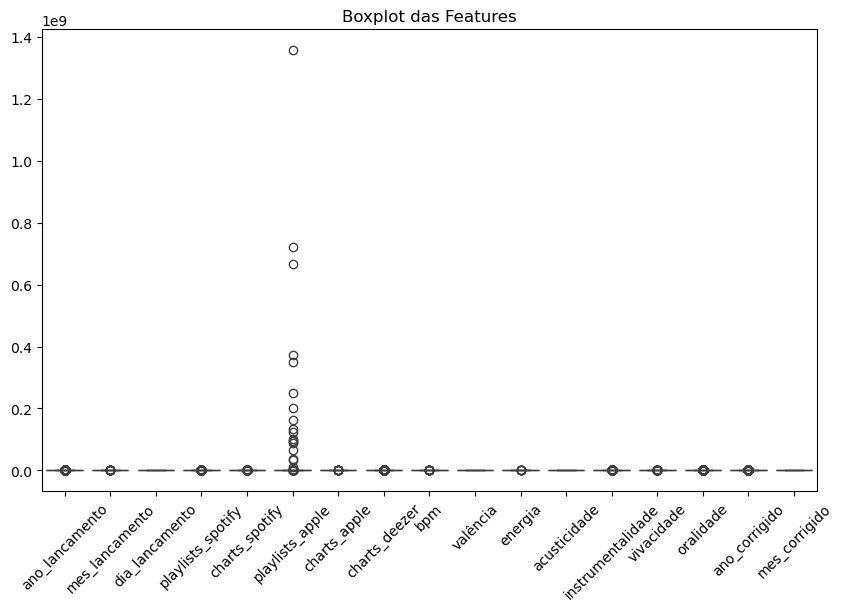

In [6]:
"""
Objetivo: Criar box plots para podermos visualizar a distribuição dos dados nas colunas numéricas da base.

1. Configura a largura e altura da figura para o gráfico usando plt.figure(figsize=())

2. Cria os box plots para todas as colunas que são numéricas usando sns.boxplot()

3. Para melhor legibilidade coloca o eixo x em 45 graus usando xticks(rotation=45)

4. Adiciona um título ao gráfico usando plt.titl

5. Exibe o gráfico

Box Plots são úteis para identificarmos a distribuição e a presença de outliers nos dados em cada coluna.
"""
#==========================================================================================================================

# Configurar tamanho da figura
plt.figure(figsize=(10, 6))

# Criar box plots para todas as colunas numéricas
sns.boxplot(data=Base_Musicas_Spotify)

# Exibir gráfico
plt.xticks(rotation=45)
plt.title("Boxplot das Features")
plt.show()

## **4. Processamento**

* **Objetivo**

As técnicas de pré processamento são extremamentes importantes para que posso realizar a tratativa da base deixando ela mais limpa e eficiente para as futura análises. Como identificado na etapa anterior denominada como `validação` encontramos algumas colunas com dados nulos. Desta forma, o intuito aqui na etapa de `processamento` é gerarmos ações que possamos realizar a tratativa desses valores removendo os nulos e inserindo preenchimentos de informação.

* **Matriz com informações das colunas com valores nulos**

| Coluna                    | Quantidade de Nulos | Interpretação |Ação           |
|---------------------------|---------------------|---------------|---------------|
| `charts_shazam`           | 50                  |Ausência de aparição em rankings do Shazam                | Preencher com 0 (assumindo "não apareceu")              |
| `tom`          | 93                     |Dados ausentes sobre o tom musical da faixa               |Avaliar preenchimento com moda ou descartar               |
| `modo`            | 1                         |Dado faltante sobre o modo (maior/menor)                  |Preencher com moda ou linha pode ser mantida  |

* **Ações Realizadas**

    * Tratamento de Dados Missing:
    
        * Nas colunas `charts_shazam` e `tom` realizei a tratativa de maneira diferentes mas que seguem o mesmo principio que seria imputar respectivos nas linhas com dados faltantes. Certamente, na coluna que tinha a segunda maior aparição de dados nulos (50) eles foram preenchidos com o valor 0, já que foi interpretado que a ausência de valor se deve pelo fato da musica não estar no rankings da plataforma. E na coluna denominada como `tom` utilizei o método estatistico moda já que eram muitos valores nulos e tinha muita a aparição de determinados tons.


In [7]:
Base_Musicas_Spotify.loc[Base_Musicas_Spotify['charts_shazam'].isnull(), 'charts_shazam'] = 0

moda = Base_Musicas_Spotify['tom'].mode()[0]
Base_Musicas_Spotify.loc[Base_Musicas_Spotify['tom'].isnull(), 'tom'] = moda

Base_Musicas_Spotify.isnull().sum()



nome_musica          0
nome_artista         0
qtd_artistas         0
ano_lancamento       0
mes_lancamento       0
dia_lancamento       0
playlists_spotify    0
charts_spotify       0
reproducoes          0
playlists_apple      0
charts_apple         0
playlists_deezer     0
charts_deezer        0
charts_shazam        0
bpm                  0
tom                  0
modo                 1
dançabilidade        0
valência             0
energia              0
acusticidade         0
instrumentalidade    0
vivacidade           0
oralidade            0
ano_corrigido        0
mes_corrigido        0
dtype: int64

## **5. Análises**

### **5.1 Análise Univariada**

**Objetivo**

A análise univariada tem como objetivo entender o comportamento individual de cada variável da base de dados. Desta forma, utilizando histogramas e valores estatisticos vamos analisar as variaveis de `reproducoes`, `bpm`, `energia`, `valência`, `playlists_spotify`, `playlists_apple`, `playlists_dezzer`. Certamente, com o intuito de verificar as distribuições dos dados, valores extremos e concentrados.


**Resultados da Análise**



In [10]:
Base_Musicas_Spotify[['reproducoes', 'bpm', 'energia', 'valência', 'playlists_spotify', 'playlists_apple', 'playlists_apple', 'playlists_deezer']].describe()

,bpm,energia,valência,playlists_spotify,playlists_apple,playlists_apple
count,947.000000,947.000000,947.000000,947.000000,9.470000e+02,9.470000e+02
mean,120.722281,64.004224,51.794087,5189.233369,5.135283e+06,5.135283e+06
std,31.395452,16.792792,23.533990,7930.019094,5.857747e+07,5.857747e+07
min,0.000000,9.000000,4.000000,1.000000,0.000000e+00,0.000000e+00
25%,98.000000,53.000000,33.000000,848.000000,1.400000e+01,1.400000e+01
50%,120.000000,66.000000,52.000000,2175.000000,3.700000e+01,3.700000e+01
75%,140.000000,77.000000,70.500000,5516.500000,9.400000e+01,9.400000e+01
max,206.000000,97.000000,97.000000,52898.000000,1.356565e+09,1.356565e+09


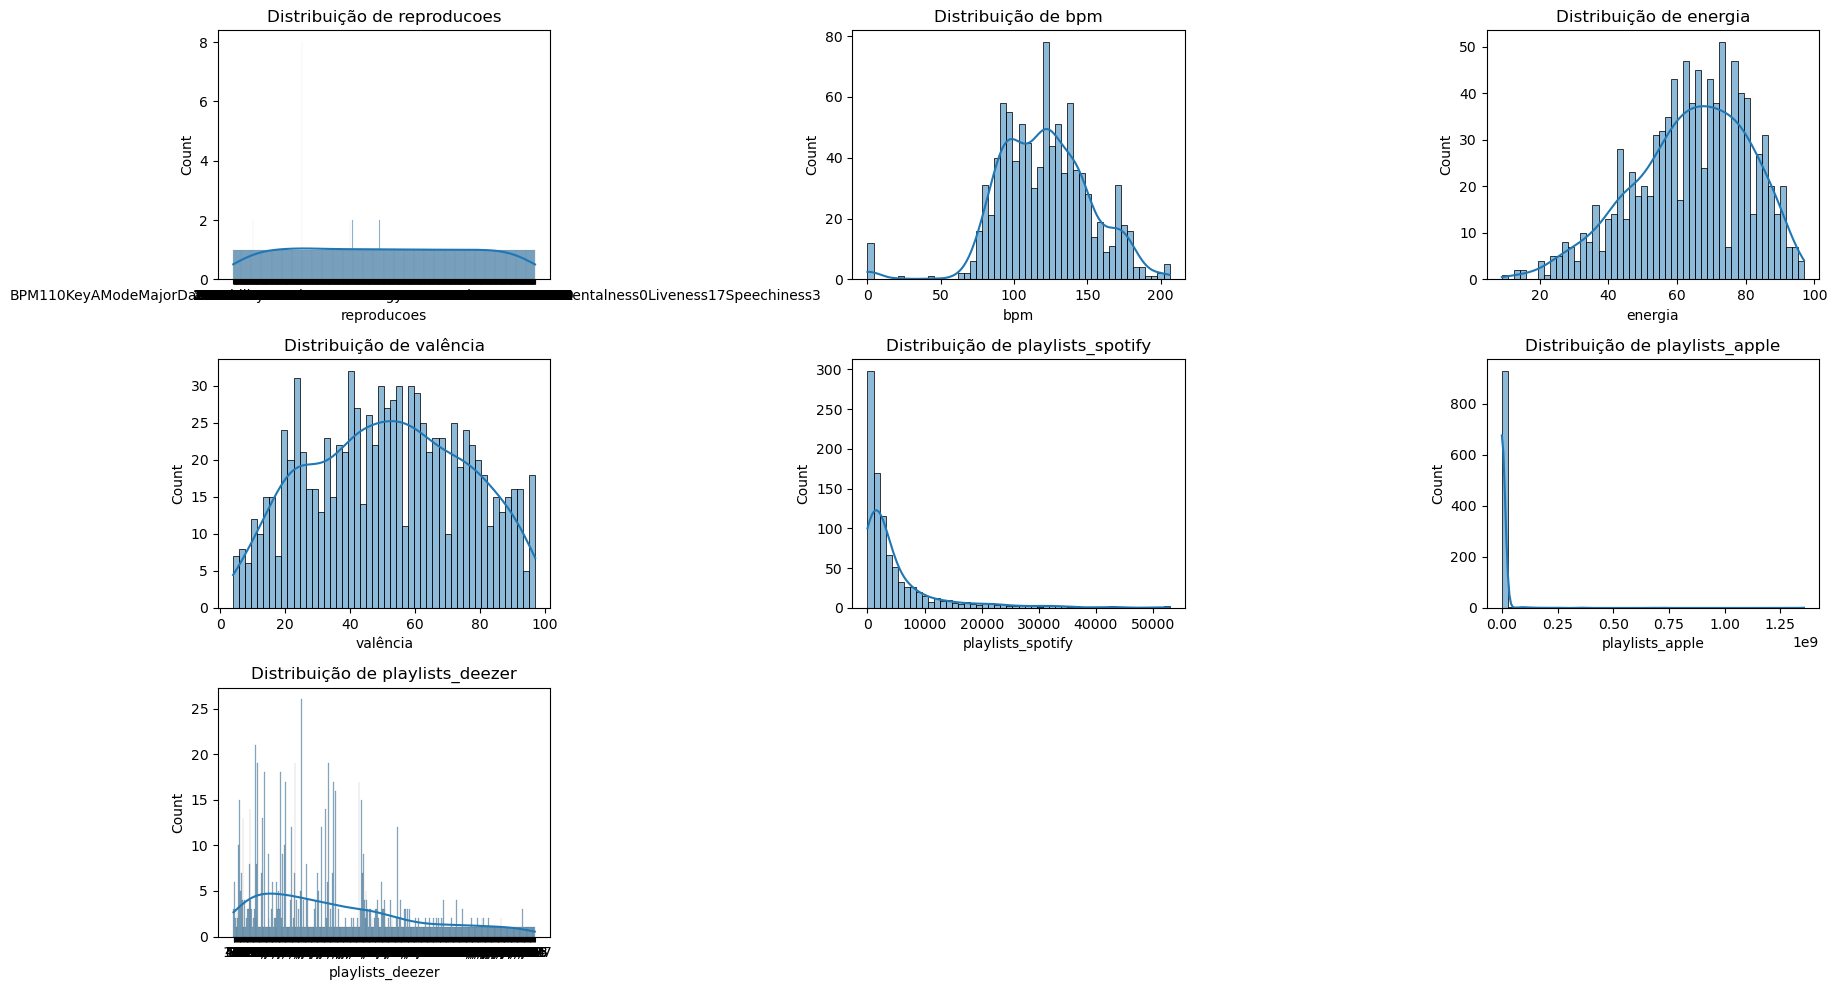

In [14]:
variaveis = ['reproducoes', 'bpm', 'energia', 'valência', 'playlists_spotify', 'playlists_apple', 'playlists_deezer']

plt.figure(figsize=(18, 10))

for i, var in enumerate(variaveis, 1):
    plt.subplot(3, 3, i)
    sns.histplot(Base_Musicas_Spotify[var], bins=50, kde=True)
    plt.title(f"Distribuição de {var}")

plt.tight_layout()
plt.show()

### **5.2 Análises Multivariadas**

**Objetivo**

A análise multivariada visa identificar relações entre diferentes variáveis da base de dados, ajudando a entender padrões e possíveis dependências. Para isso, utilizamos a matriz de correlação e gráficos de dispersão para medirmos o grau de associação entre as variáveis numéricas.



In [18]:
Base_Musicas_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome_musica        947 non-null    object
 1   nome_artista       947 non-null    object
 2   qtd_artistas       947 non-null    object
 3   ano_lancamento     947 non-null    int64 
 4   mes_lancamento     947 non-null    int64 
 5   dia_lancamento     947 non-null    int64 
 6   playlists_spotify  947 non-null    int64 
 7   charts_spotify     947 non-null    int64 
 8   reproducoes        947 non-null    object
 9   playlists_apple    947 non-null    int64 
 10  charts_apple       947 non-null    int64 
 11  playlists_deezer   947 non-null    object
 12  charts_deezer      947 non-null    int64 
 13  charts_shazam      947 non-null    object
 14  bpm                947 non-null    int64 
 15  tom                947 non-null    object
 16  modo               946 non-null    object
 1

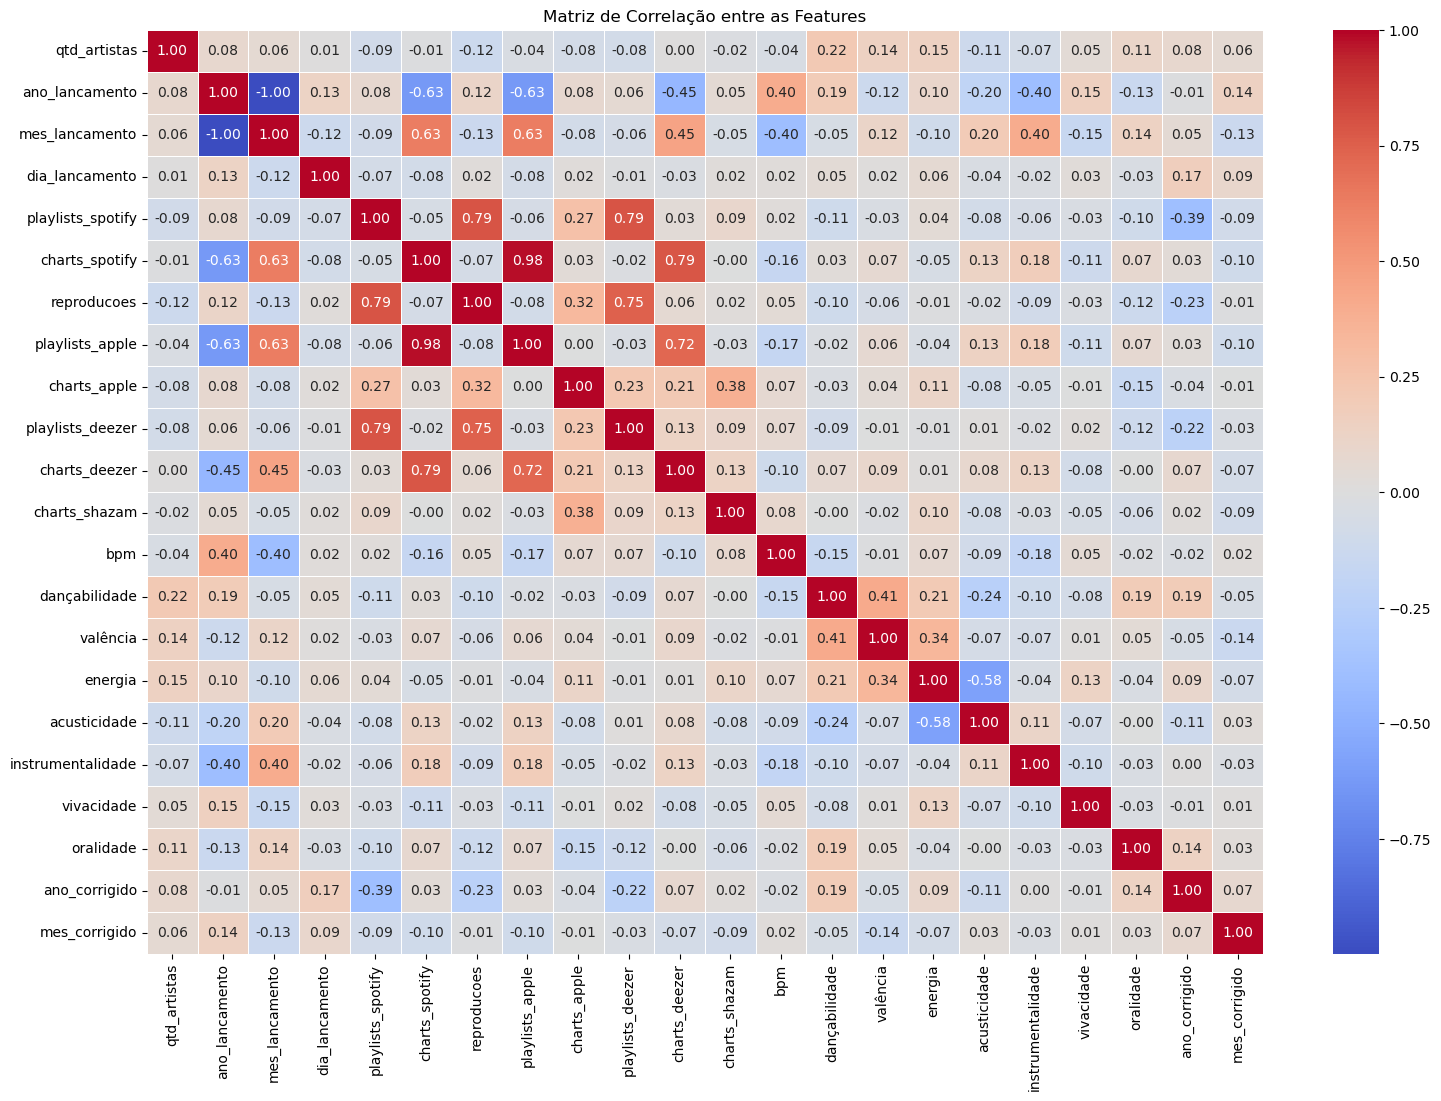

In [27]:
# Seleciona só as colunas numéricas
df_numerico = Base_Musicas_Spotify.select_dtypes(include='number')

# Heatmap com essas colunas
plt.figure(figsize=(18, 12))
sns.heatmap(df_numerico.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre as Features")
plt.show()


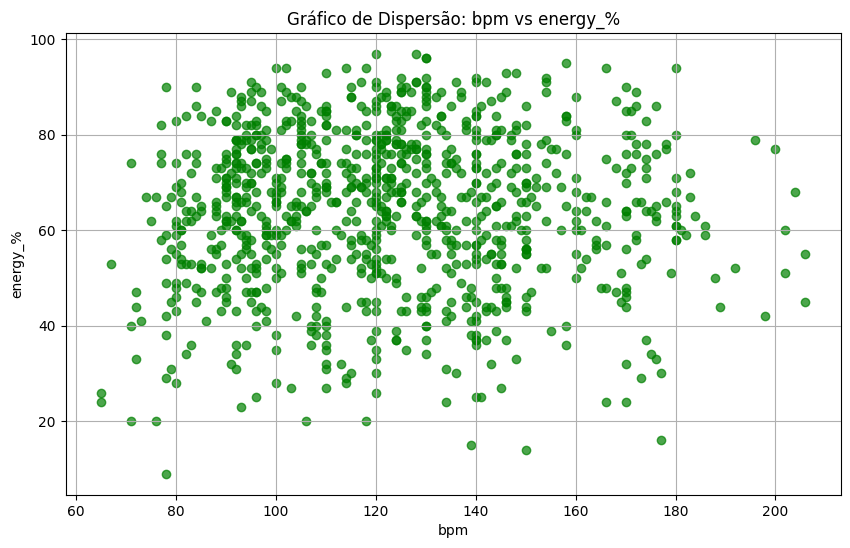

In [ ]:
x_column = 'bpm'
y_column = 'energy_%'

plt.figure(figsize=(10, 6))
plt.scatter(df[x_column], df[y_column], color='green', alpha=0.7)
plt.title(f'Gráfico de Dispersão: {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

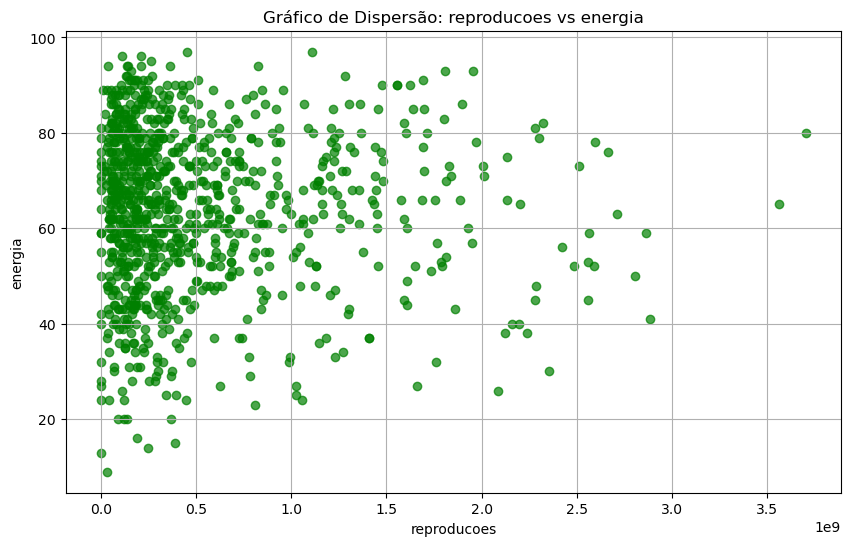

In [29]:
x_column = 'reproducoes'
y_column = 'energia'

plt.figure(figsize=(10, 6))
plt.scatter(Base_Musicas_Spotify[x_column], Base_Musicas_Spotify[y_column], color='green', alpha=0.7)
plt.title(f'Gráfico de Dispersão: {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

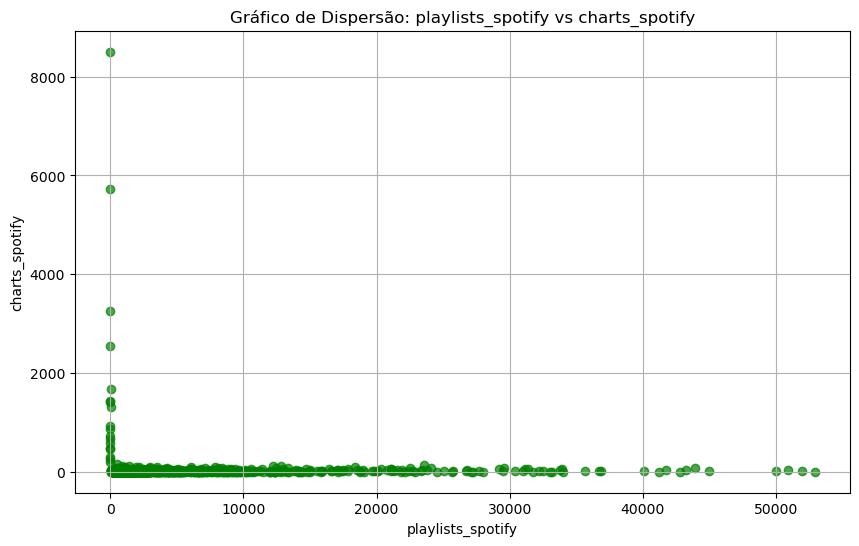

In [30]:
x_column = 'playlists_spotify'
y_column = 'charts_spotify'

plt.figure(figsize=(10, 6))
plt.scatter(Base_Musicas_Spotify[x_column], Base_Musicas_Spotify[y_column], color='green', alpha=0.7)
plt.title(f'Gráfico de Dispersão: {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

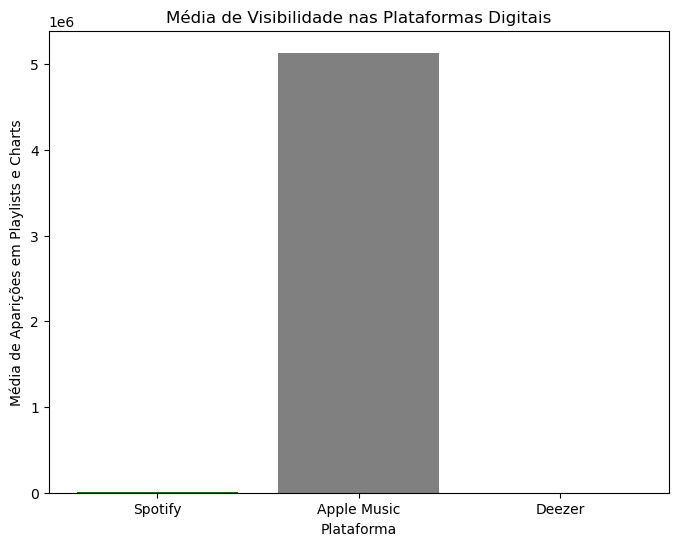

In [31]:

# Média de visibilidade por plataforma
media_visibilidade = {
    "Spotify": Base_Musicas_Spotify[["playlists_spotify", "charts_spotify"]].mean().sum(),
    "Apple Music": Base_Musicas_Spotify[["playlists_apple", "charts_apple"]].mean().sum(),
    "Deezer": Base_Musicas_Spotify[["playlists_deezer", "charts_deezer"]].mean().sum()
}

plt.figure(figsize=(8, 6))
plt.bar(media_visibilidade.keys(), media_visibilidade.values(), color=['green', 'gray', 'purple'])
plt.title("Média de Visibilidade nas Plataformas Digitais")
plt.ylabel("Média de Aparições em Playlists e Charts")
plt.xlabel("Plataforma")
plt.show()
